# IMPORT LIBRARIES

In [ ]:
#importing packages
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2

# DATA PREPARATION

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
train_images = train_images.astype("float32") / 255     # (.astype(): changes the data type of the data frame)
test_images = test_images.astype("float32") / 255

print("x_train shape:", train_images.shape)
print(train_images.shape[0], "train samples")
print(test_images.shape[0], "test samples")


# convert class vectors to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


# MODEL BUILDING

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)


# MODEL TRAINING

In [ ]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 59s 130ms/step - loss: 0.3733 - accuracy: 0.8866 - val_loss: 0.0831 - val_accuracy: 0.9778
Epoch 2/5
422/422 [==============================] - 45s 107ms/step - loss: 0.1176 - accuracy: 0.9645 - val_loss: 0.0583 - val_accuracy: 0.9828
Epoch 3/5
422/422 [==============================] - 48s 114ms/step - loss: 0.0882 - accuracy: 0.9721 - val_loss: 0.0497 - val_accuracy: 0.9858
Epoch 4/5
422/422 [==============================] - 46s 109ms/step - loss: 0.0744 - accuracy: 0.9772 - val_loss: 0.0468 - val_accuracy: 0.9873
Epoch 5/5
422/422 [==============================] - 47s 110ms/step - loss: 0.0641 - accuracy: 0.9800 - val_loss: 0.0390 - val_accuracy: 0.9887


# MODEL EVALUATION

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
model.save('mnist')

Test loss: 0.03481988608837128
Test accuracy: 0.9879999756813049


# EXECUTION 1


LABEL: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0

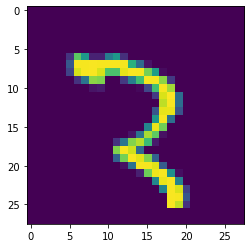

In [ ]:
# You can put between 0 to 59999 here
index = 500
# Set number of characters per row when printing
np.set_printoptions(linewidth = 300)

# Print the label and image
print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')

# Visualize the image
plt.imshow(train_images[index])

# EXECUTION 2

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[]

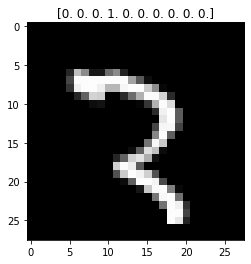

In [ ]:
plt.title(train_labels[index])
plt.imshow(train_images[index], cmap='gray')
plt.plot()

# EXECUTION 3

1/1 [==============================] - 0s 95ms/step
4


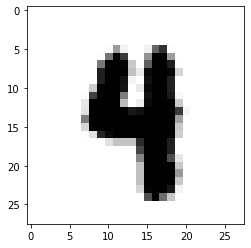

In [ ]:
index = 250
plt.imshow(test_images[index].reshape(28, 28),cmap='Greys')
predict = test_images[index].reshape(28,28)
pred = model.predict(test_images[index].reshape(1, 28, 28, 1))
print(pred.argmax())